In [43]:
import pandas as pd

In [44]:
df = pd.read_csv(r'C:\Users\kesav\Guvi\guvi main\capstone4\Copper_Set.xlsx - Result 1.csv', low_memory=False)

In [45]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column}: {unique_values}")

id: 181672
item_date: 253
quantity tons: 181673
customer: 1170
country: 18
status: 10
item type: 7
application: 31
thickness: 595
width: 1386
material_ref: 16564
product_ref: 33
delivery date: 29
selling_price: 9796


In [46]:
def remove_invalid_material_ref(x):
    if isinstance(x, float) or x.startswith('00000'):
        return None
    else:
        return x

df['material_ref'] = df['material_ref'].apply(remove_invalid_material_ref)

In [47]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['country']=pd.to_numeric(df['country'], errors='coerce')
df['application']=pd.to_numeric(df['application'], errors='coerce')
df['customer']=pd.to_numeric(df['customer'], errors='coerce')

In [48]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [50]:
mapping = {
    'Won': ['Won'],
    'Lost': ['Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Revised', 'Offered', 'Offerable','Wonderful']
}

# Function to map categories
def map_categories(status):
    for key, values in mapping.items():
        if status in values:
            return key
    return status

# Apply mapping to the 'status' column
df['status'] = df['status'].apply(map_categories)

In [51]:
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [52]:
df.drop(columns=['id','material_ref'], inplace=True)

In [53]:
df = df.dropna()

inconsistent_dates = airbnb[airbnb['listing_added'].dt.date > airbnb['last_review'].dt.date]
inconsistent_dates

In [54]:
inconsistent_dates =df[df['item_date'] > df['delivery date']]
print(inconsistent_dates.head())
inconsistent_dates.shape


     item_date  quantity tons    customer  country status item type  \
2   2021-04-01     386.127949  30153963.0     30.0    Won        WI   
3   2021-04-01     202.411065  30349574.0     32.0    Won         S   
4   2021-04-01     785.526262  30211560.0     28.0    Won         W   
7   2021-04-01     113.387124  30342192.0     32.0    Won         W   
11  2021-04-01     113.995666  30342192.0     32.0    Won         W   

    application  thickness   width  product_ref delivery date  selling_price  
2          28.0       0.38   952.0       628377    2021-01-01         644.33  
3          59.0       2.30  1317.0   1668701718    2021-01-01         768.00  
4          10.0       4.00  2000.0       640665    2021-03-01         577.00  
7          41.0       0.68  1220.0       611993    2021-01-01         931.00  
11         41.0       0.55  1220.0       611993    2021-01-01         954.00  


(16107, 12)

8.9 percentage of data are inconsistent

In [55]:
replacement_date = df['delivery date'].mode()

In [56]:
df.loc[df['delivery date'] <df['item_date'], 'delivery date'] = replacement_date

In [57]:
inconsistent_dates_1 =df[df['item_date'] > df['delivery date']]
inconsistent_dates_1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price


In [58]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [59]:
type(df['item_date'][0])

datetime.date

In [60]:
df['item_year'] = df['item_date'].apply(lambda x: x.year)
df['item_month'] = df['item_date'].apply(lambda x: x.month)
df['item_day'] = df['item_date'].apply(lambda x: x.day)

# Alternatively, you can define a custom function to extract year, month, and day
def extract_date_components(date):
    return date.year, date.month, date.day

df['item_year'], df['item_month'], df['item_day'] = zip(*df['item_date'].apply(extract_date_components))

In [61]:
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [62]:
df['d_year'] = df['delivery date'].apply(lambda x: x.year)
df['d_month'] = df['delivery date'].apply(lambda x: x.month)
df['d_day'] = df['delivery date'].apply(lambda x: x.day)
df['d_year'], df['d_month'], df['d_day'] = zip(*df['delivery date'].apply(extract_date_components))

In [63]:
df.shape

(181633, 18)

In [64]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day'],
      dtype='object')

In [65]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [66]:
from sklearn.preprocessing import OrdinalEncoder
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [68]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day'],
      dtype='object')

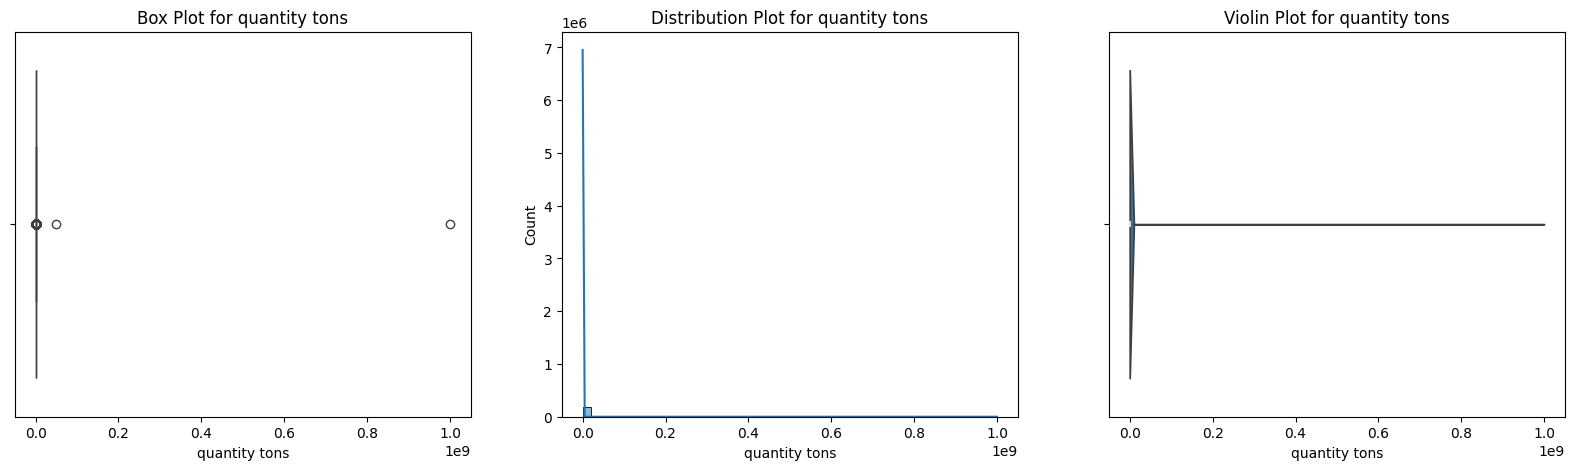

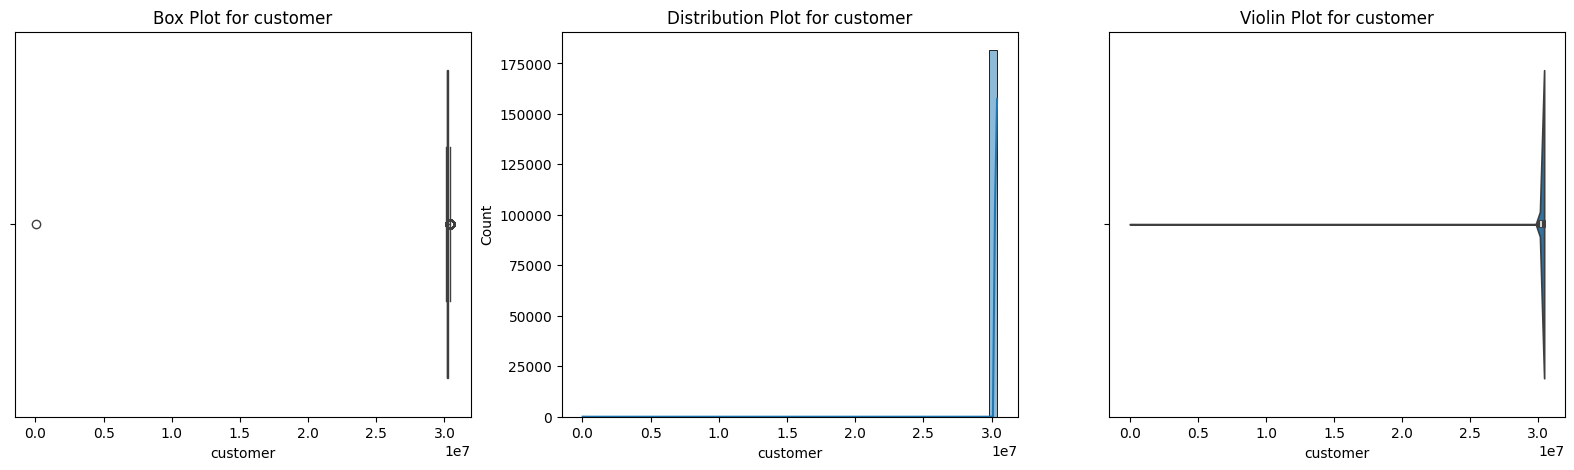

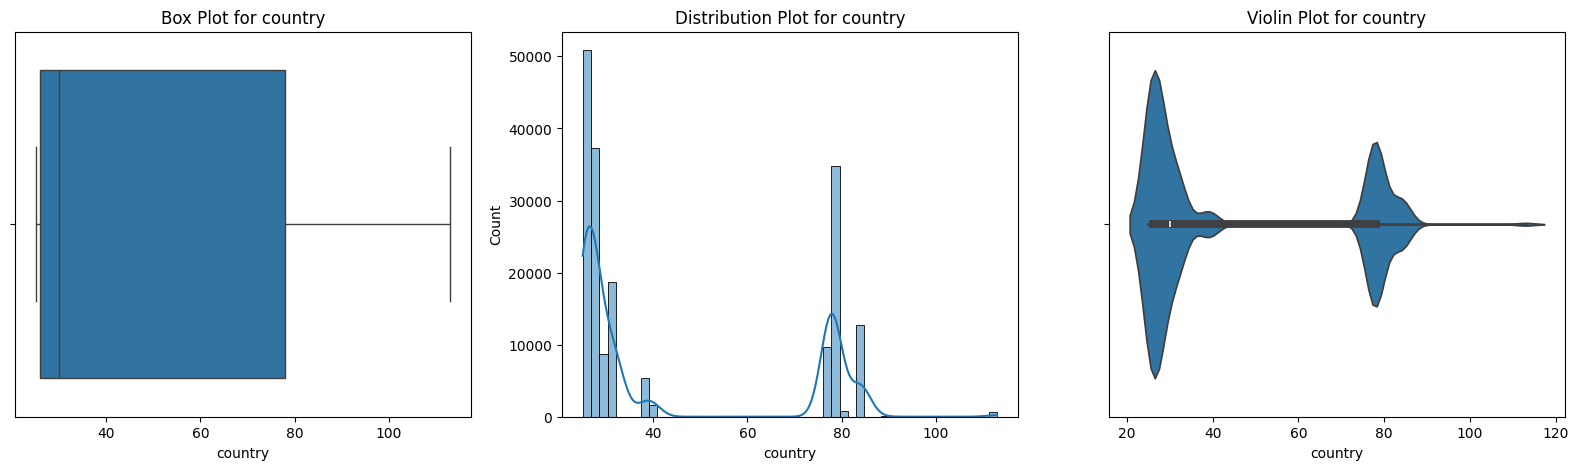

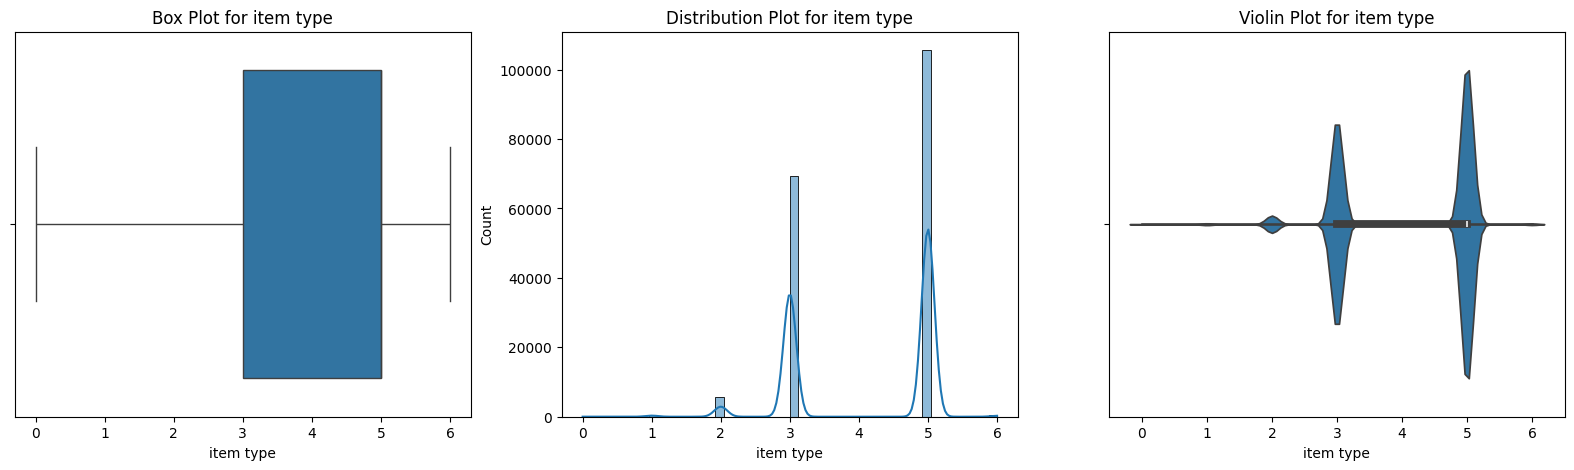

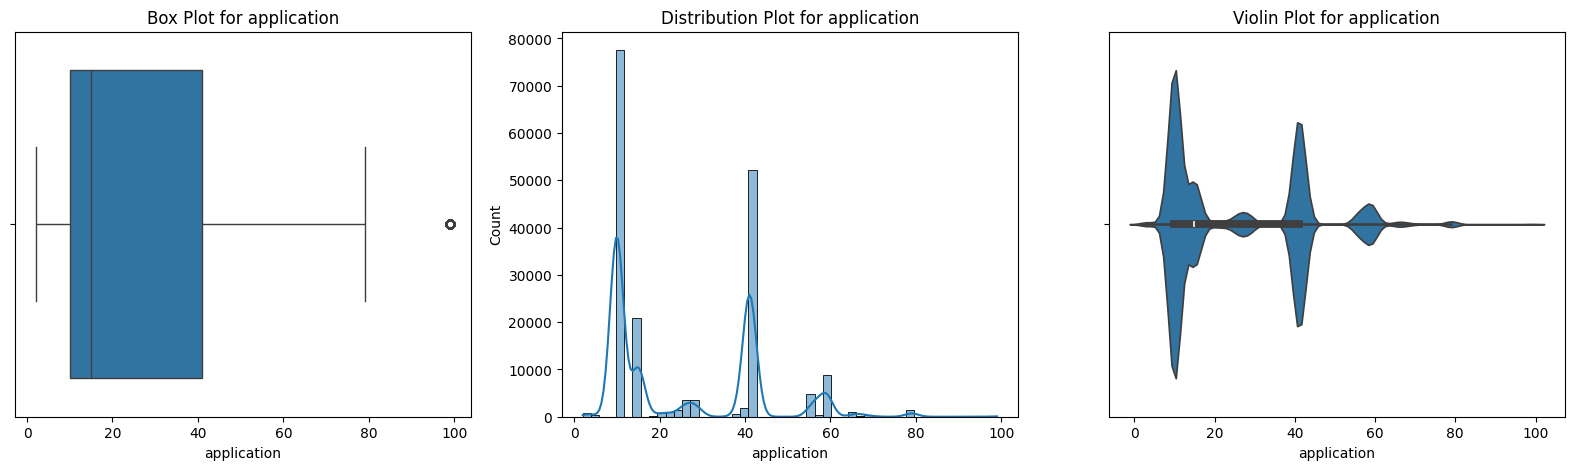

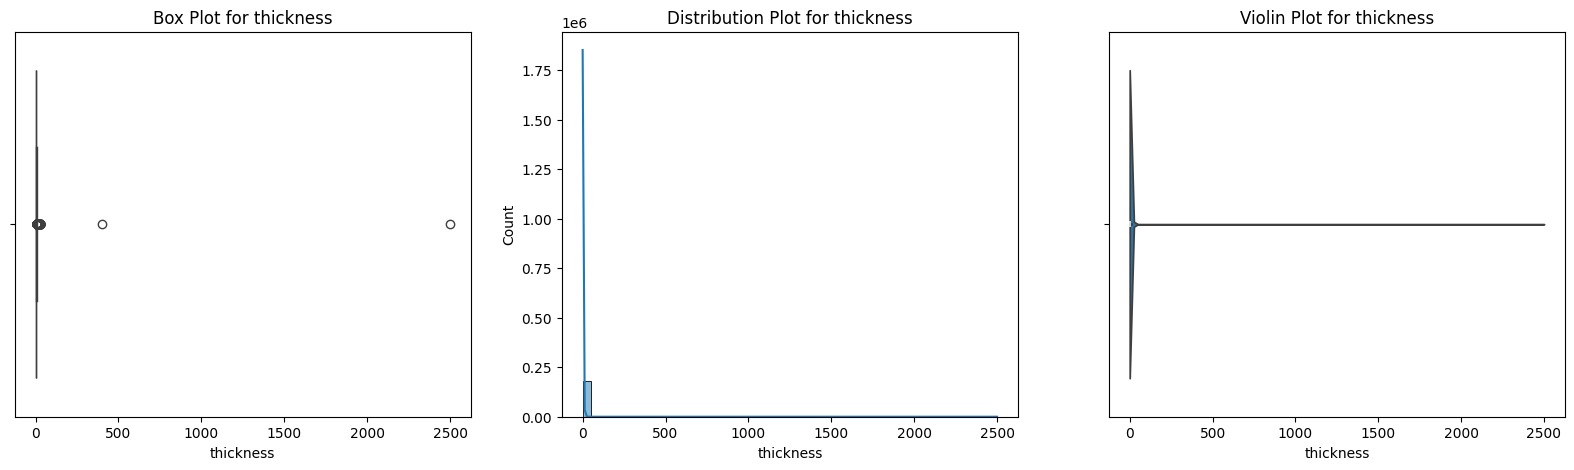

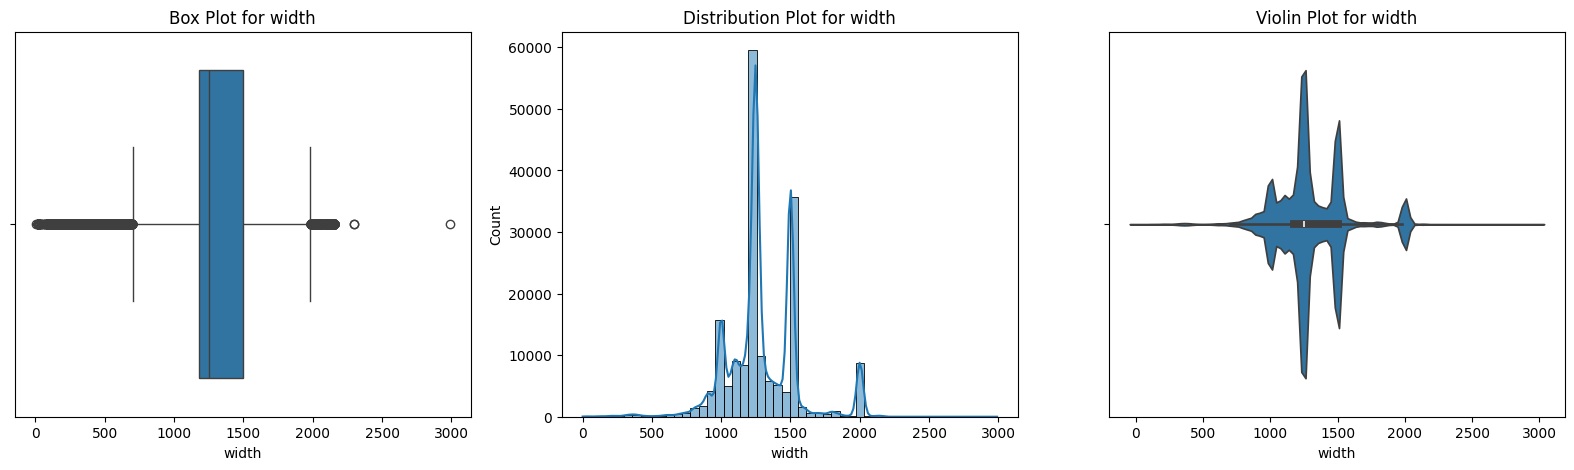

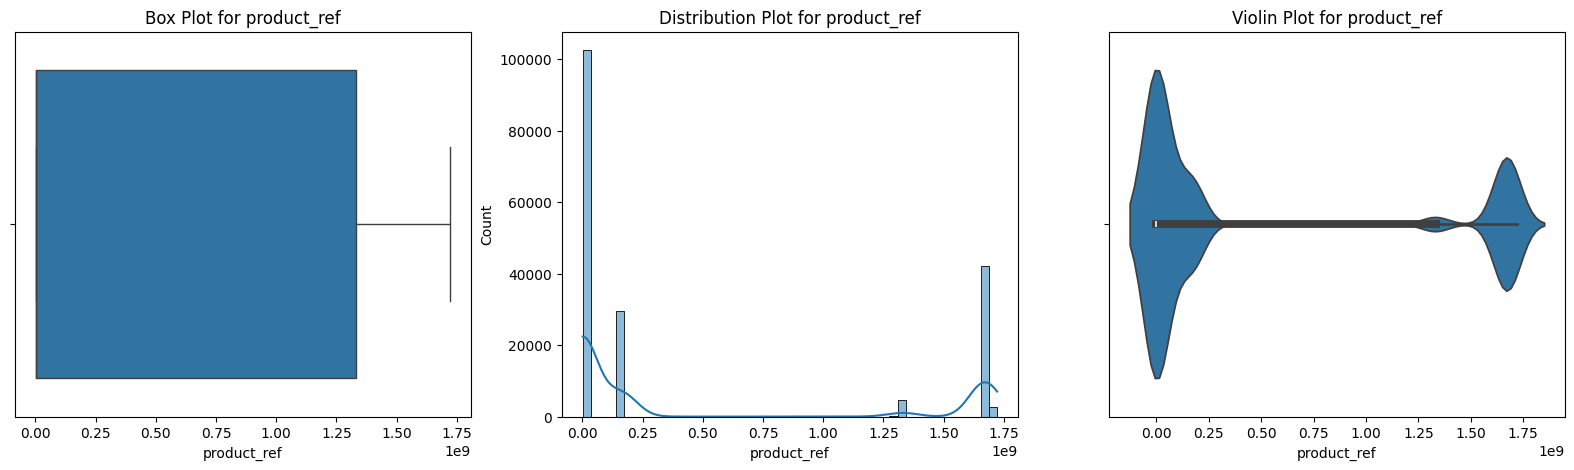

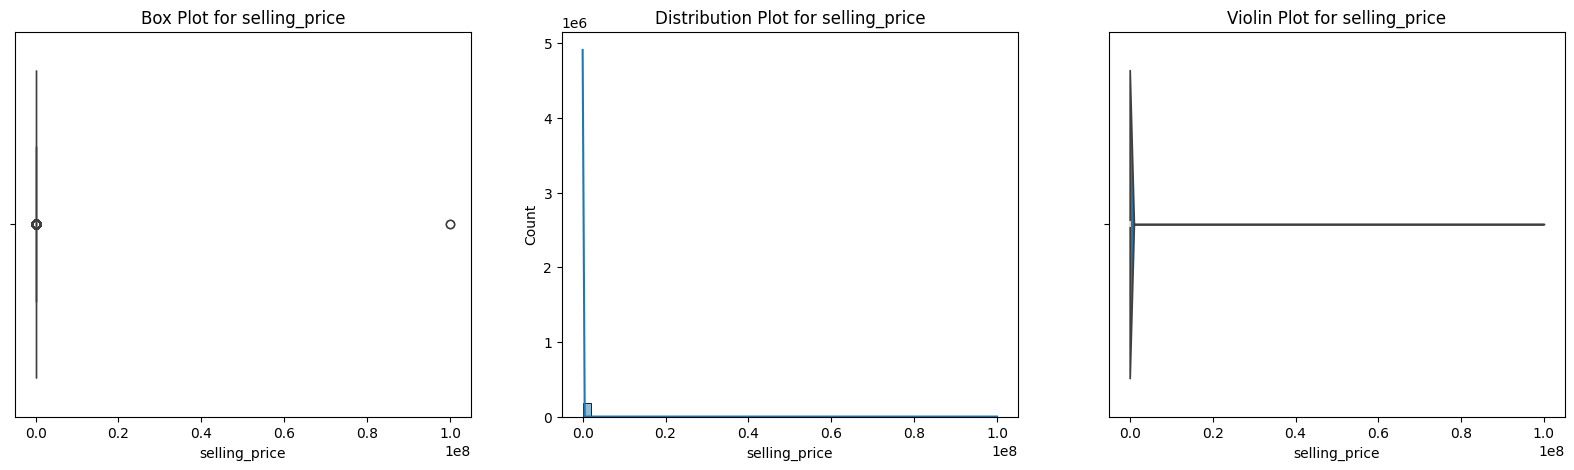

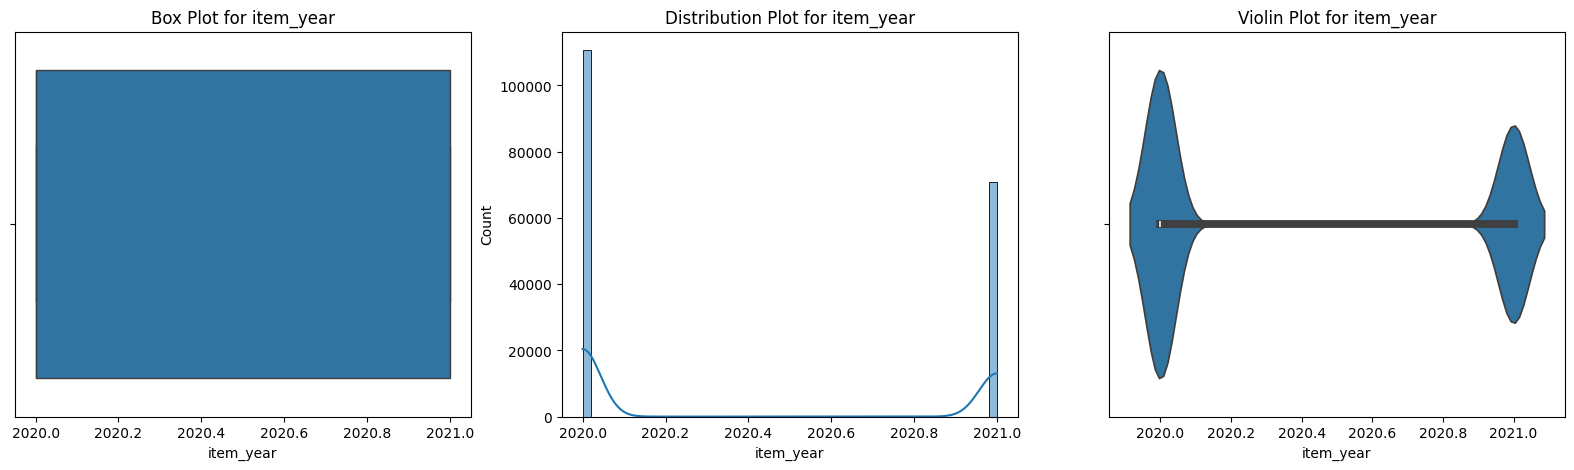

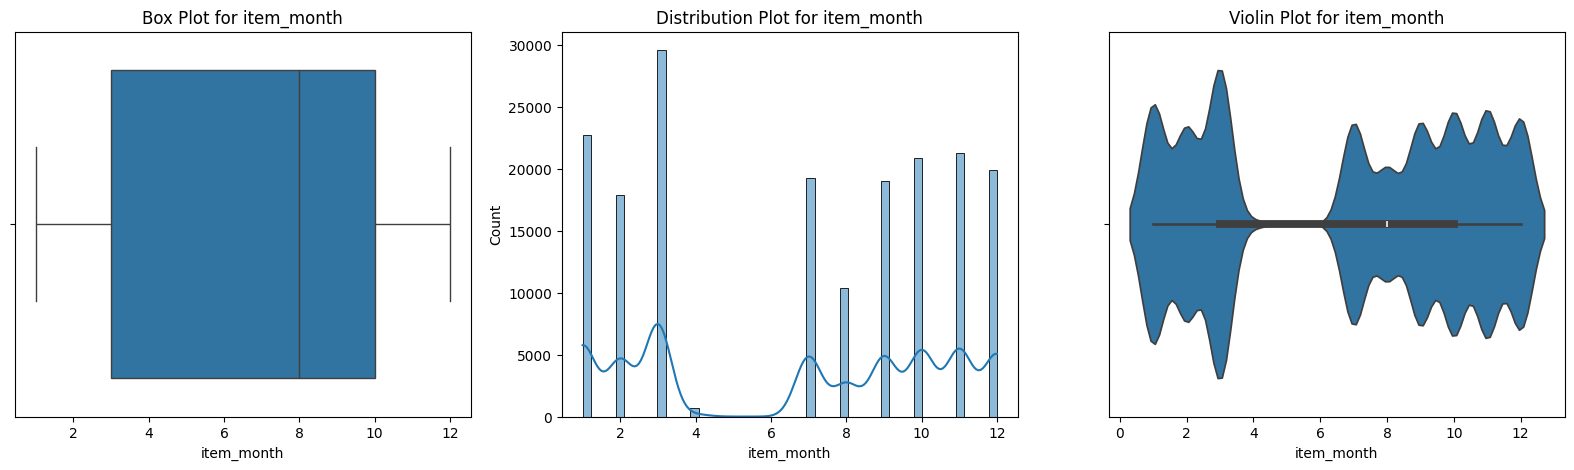

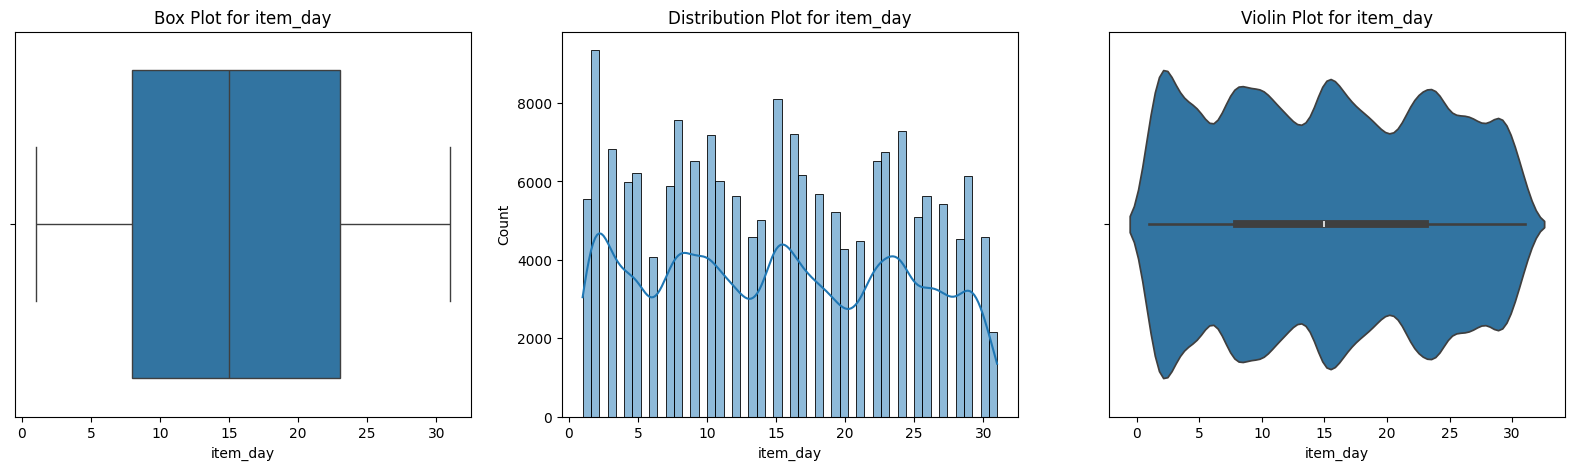

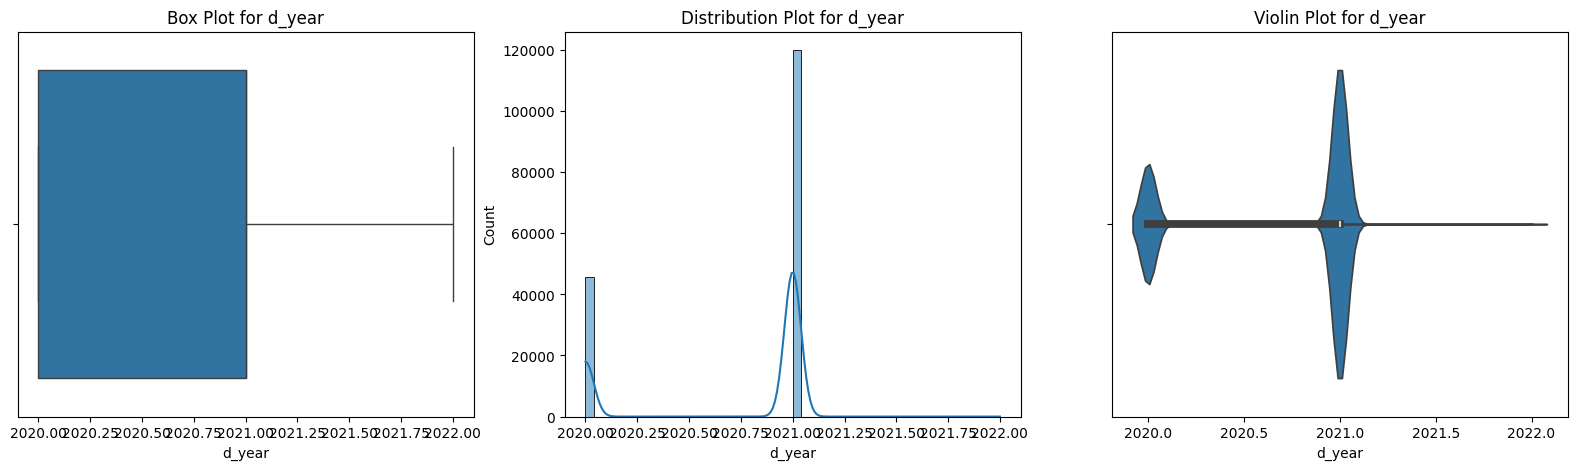

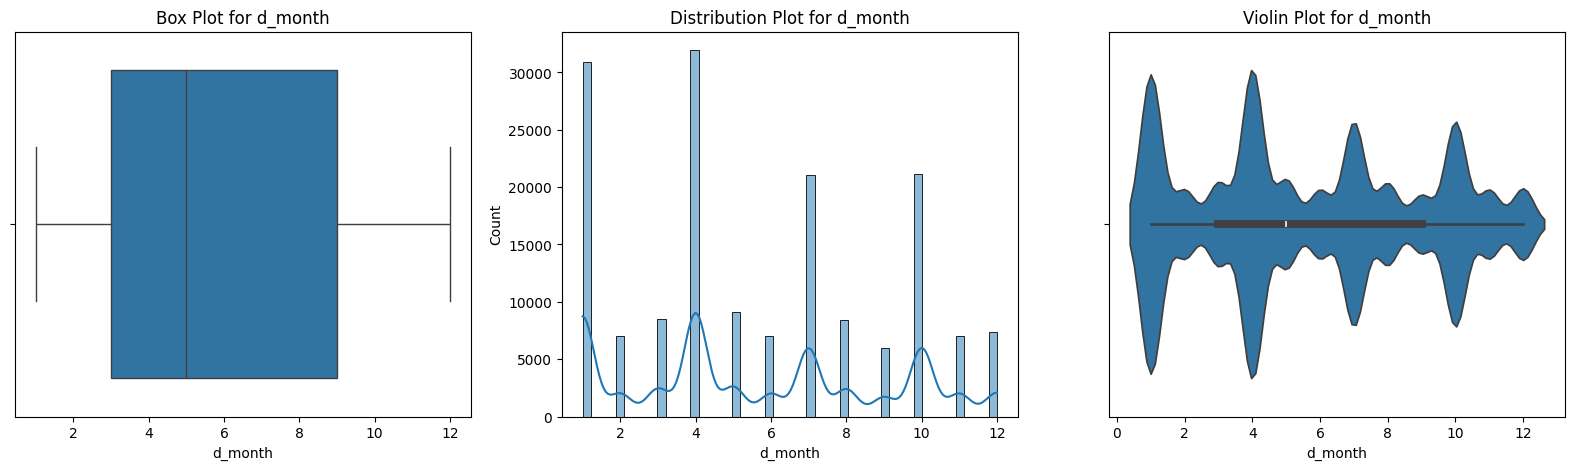

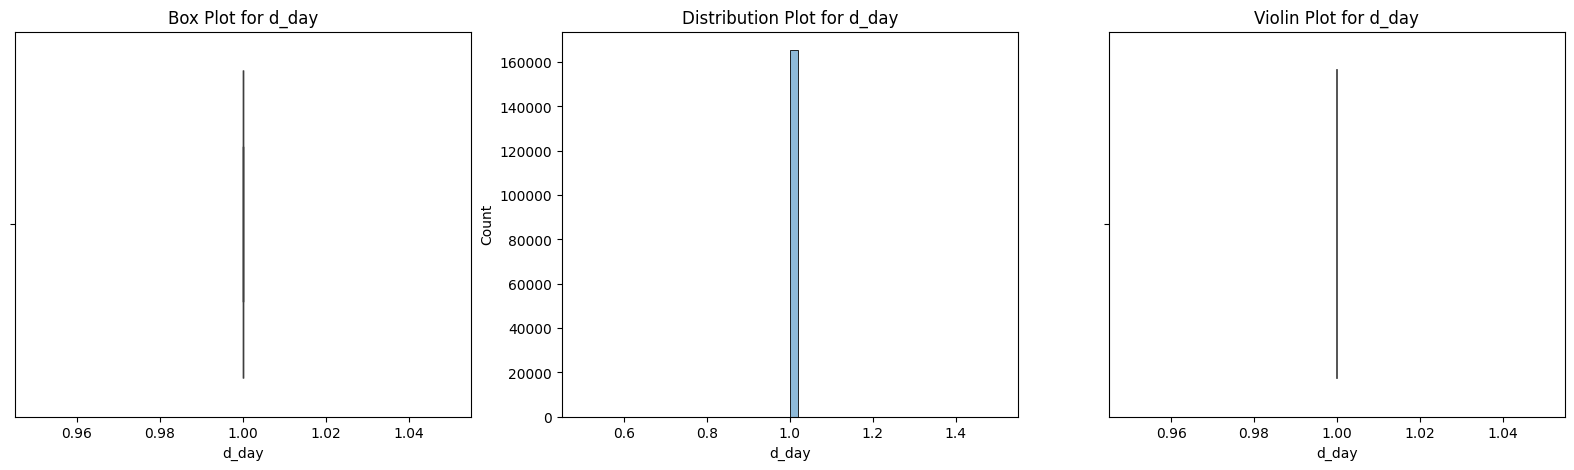

In [70]:
for i in ['quantity tons', 'customer', 'country',
       'item type', 'application', 'thickness', 'width', 'product_ref',
        'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day']:
    plot(df, i)

In [71]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [72]:
numeric_cols=['quantity tons', 'customer', 'country',
       'item type', 'application', 'thickness', 'width', 'product_ref',
        'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day']
for column in numeric_cols:
    df = remove_outliers_iqr(df, column)

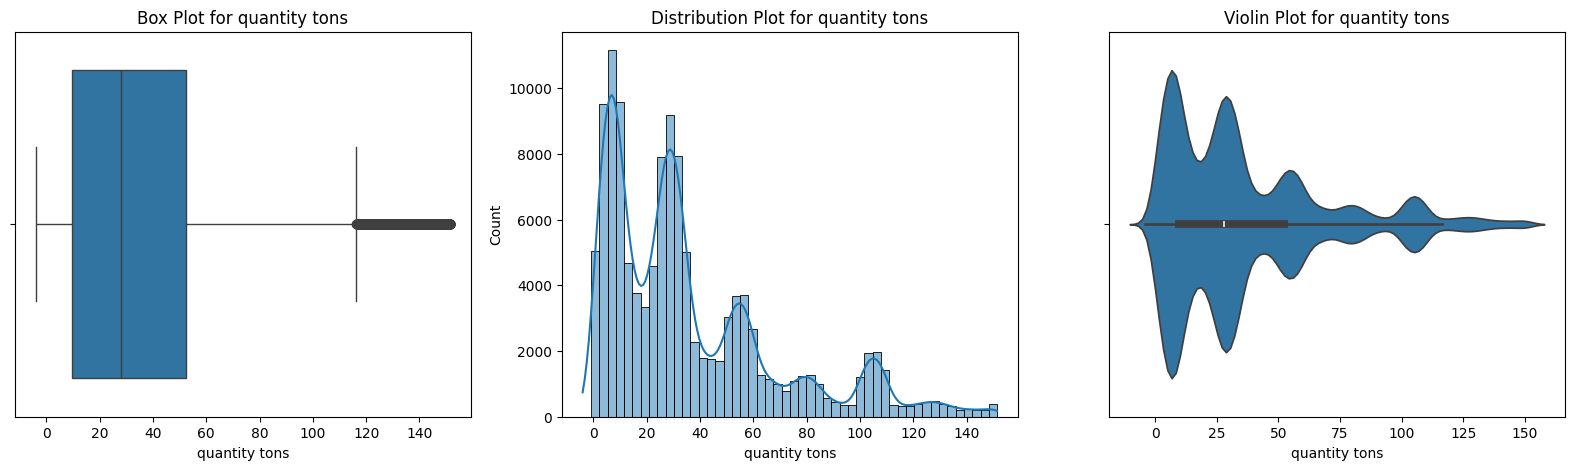

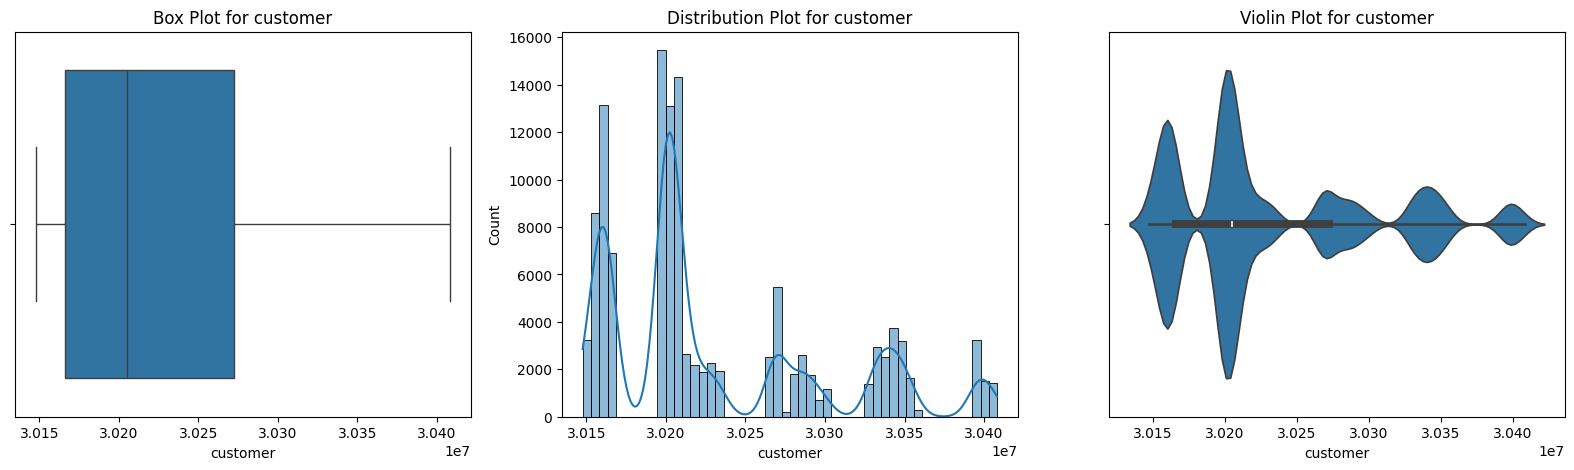

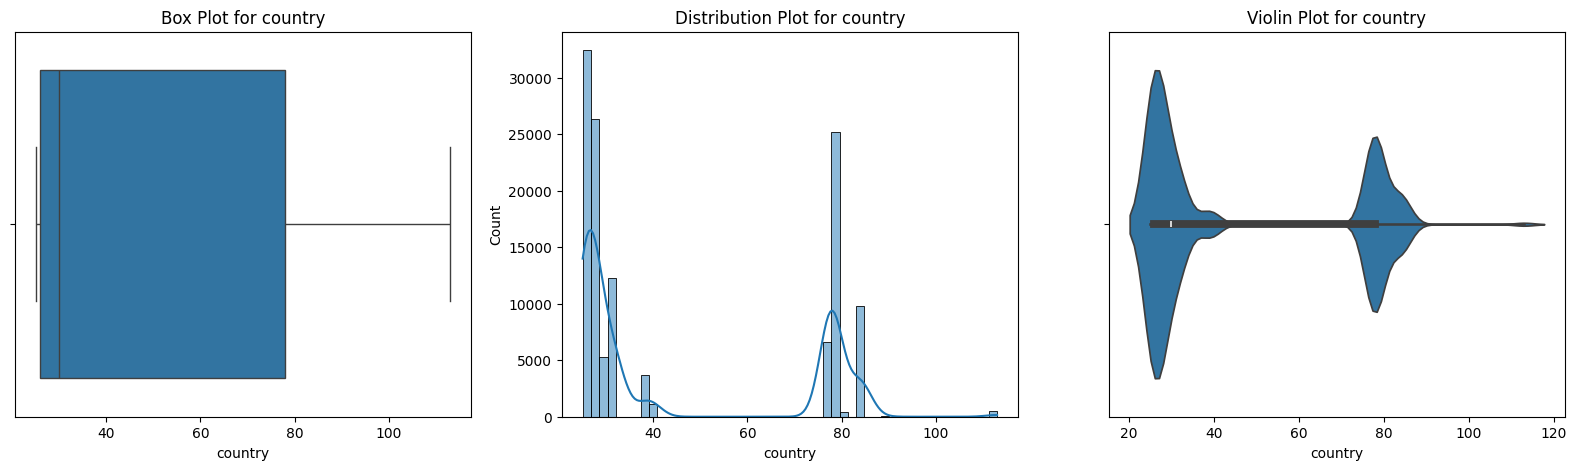

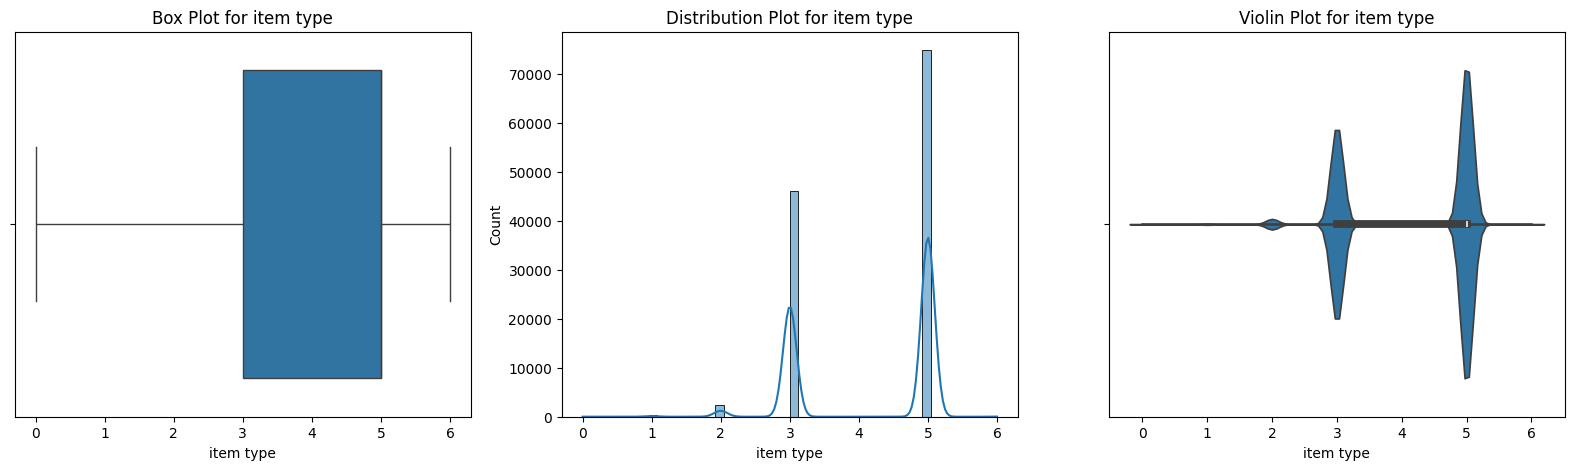

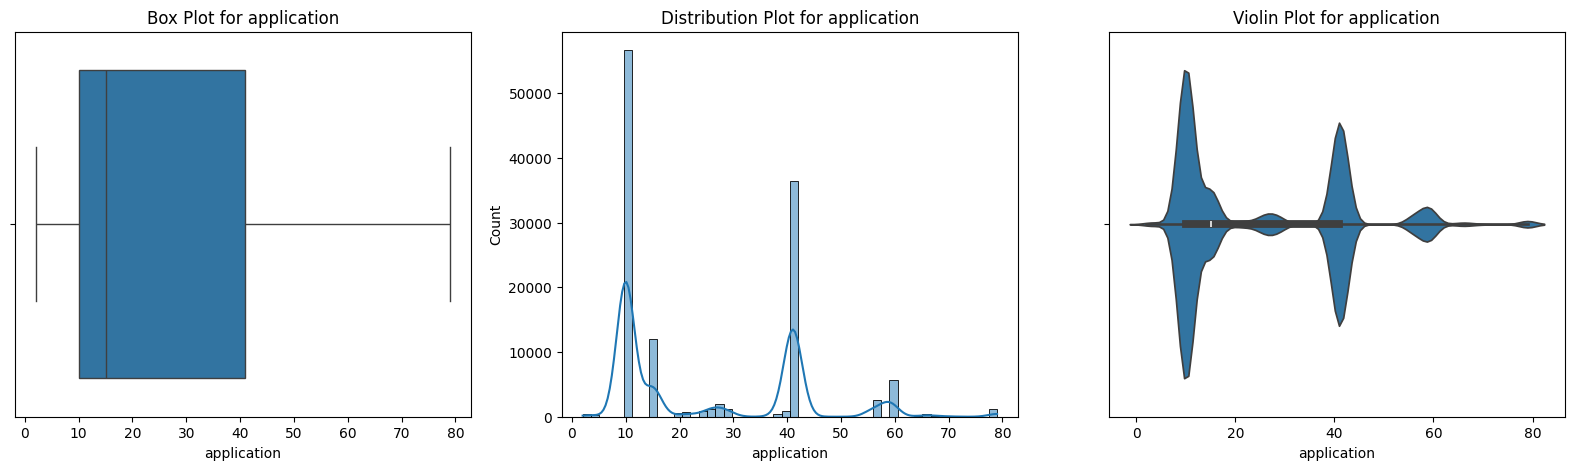

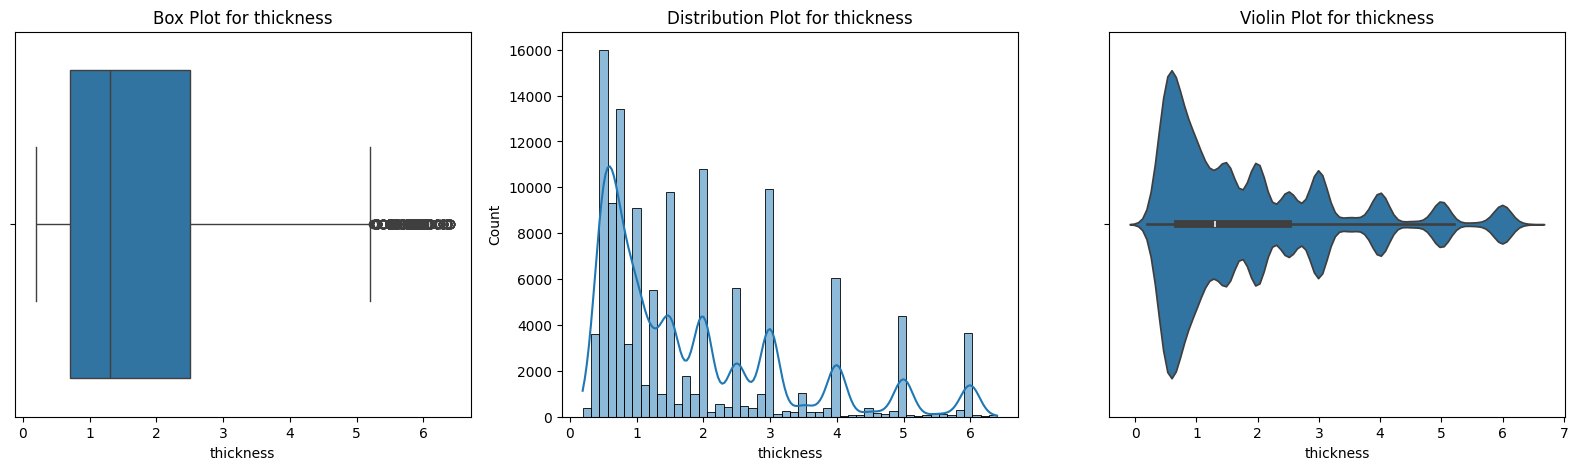

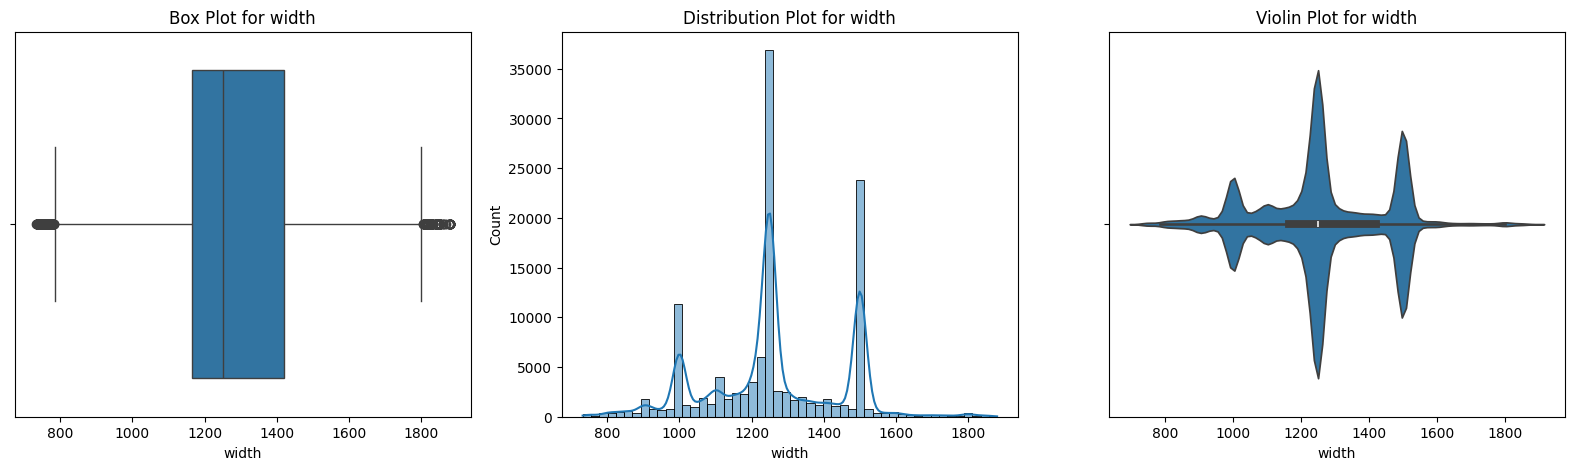

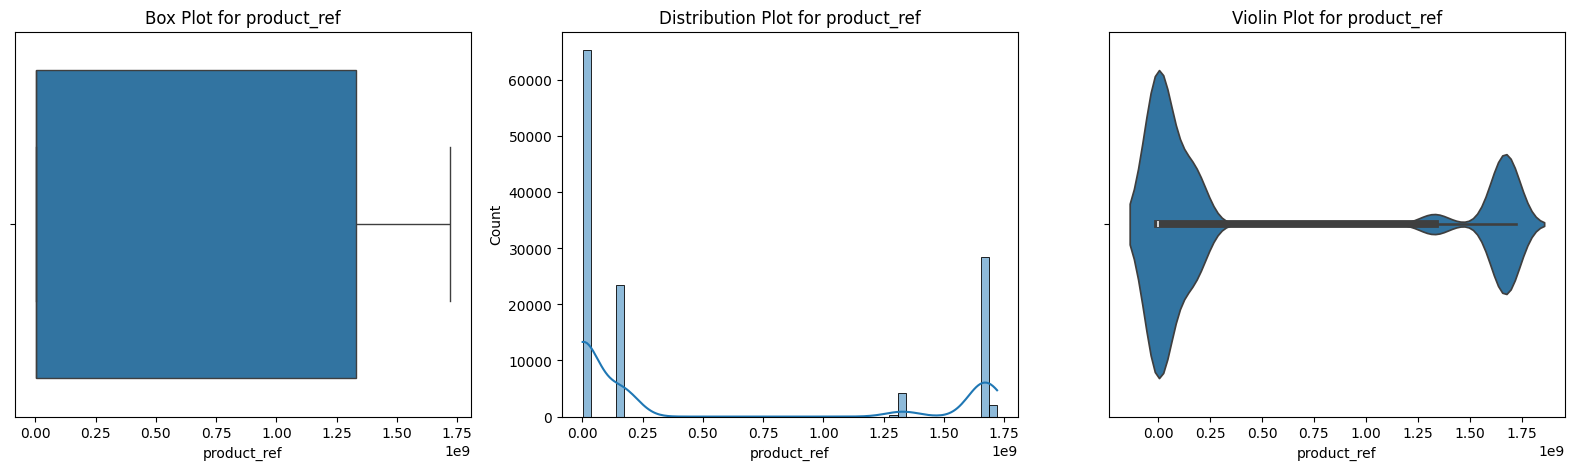

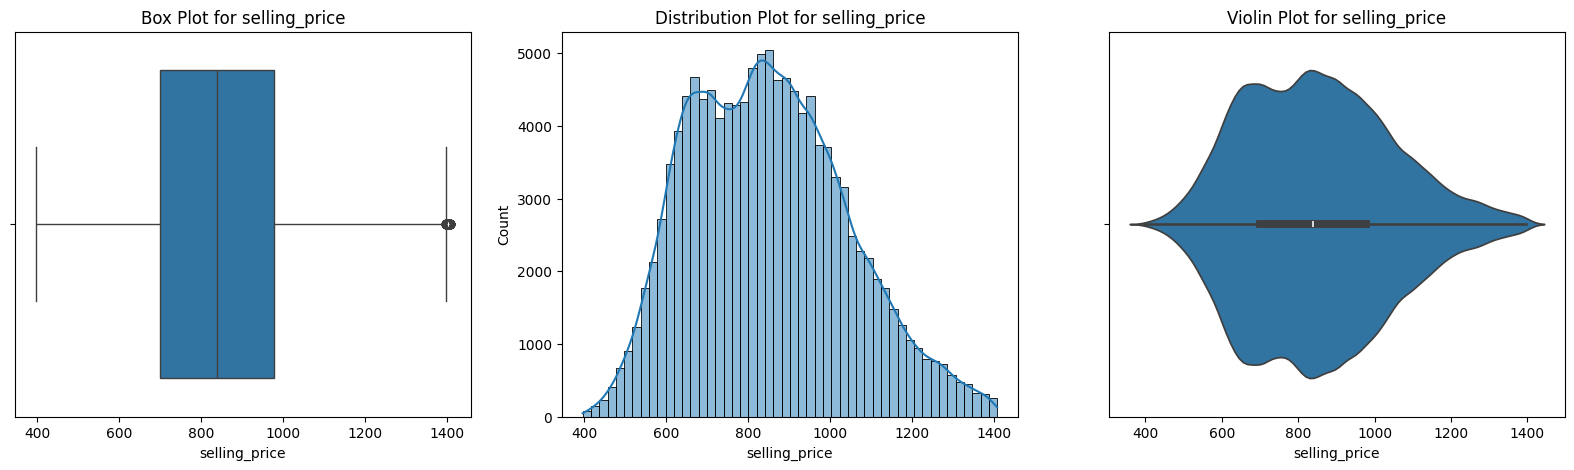

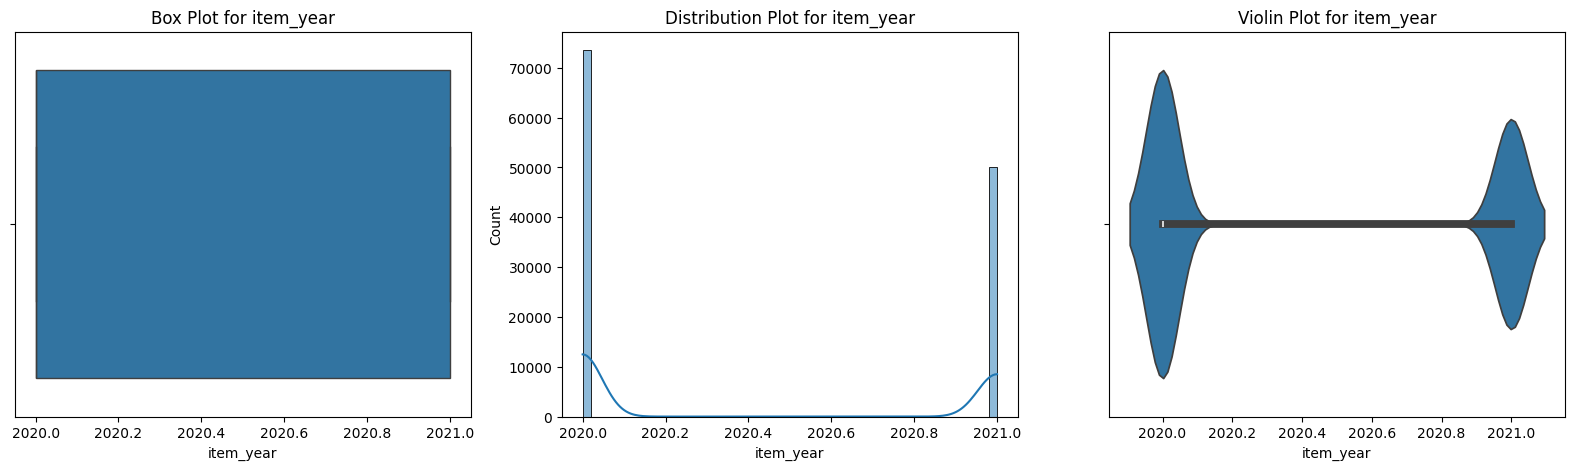

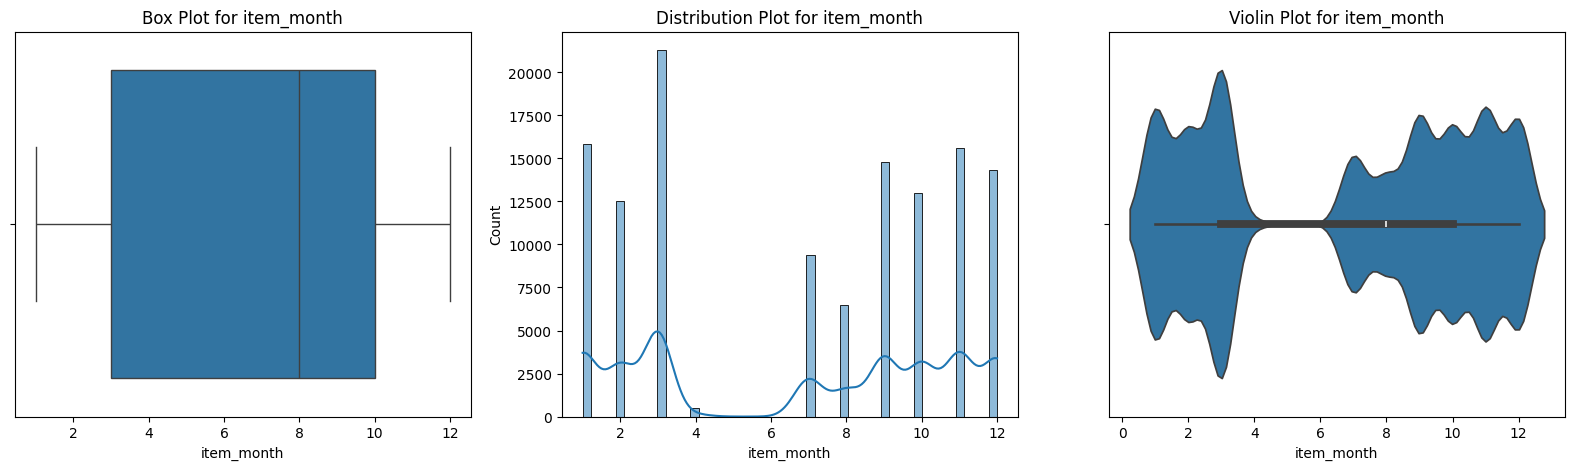

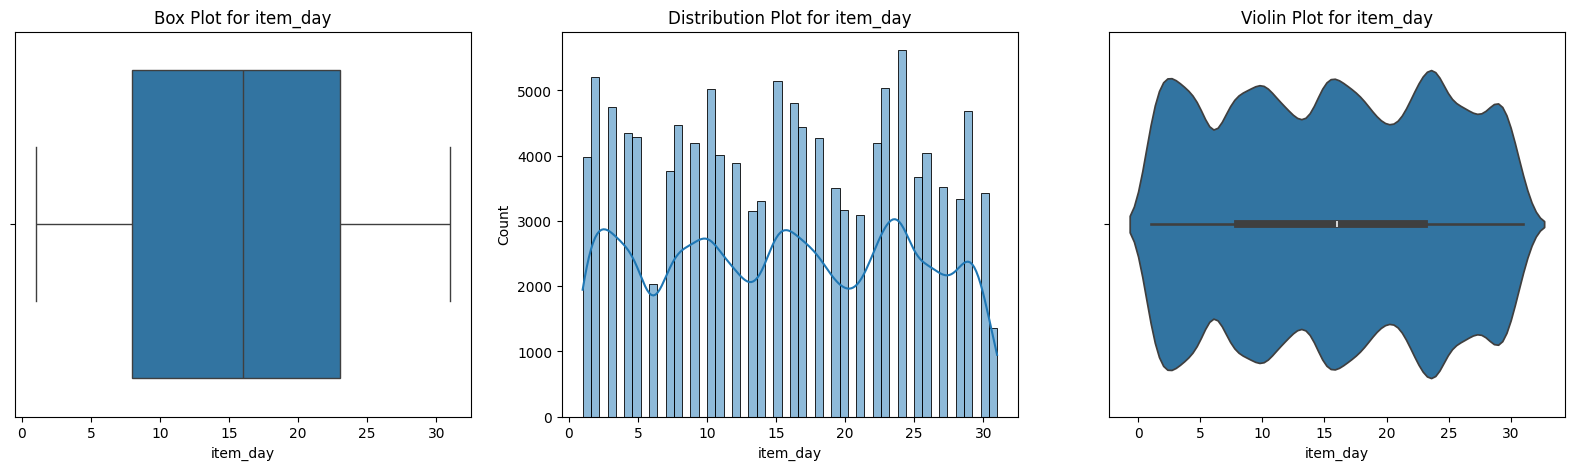

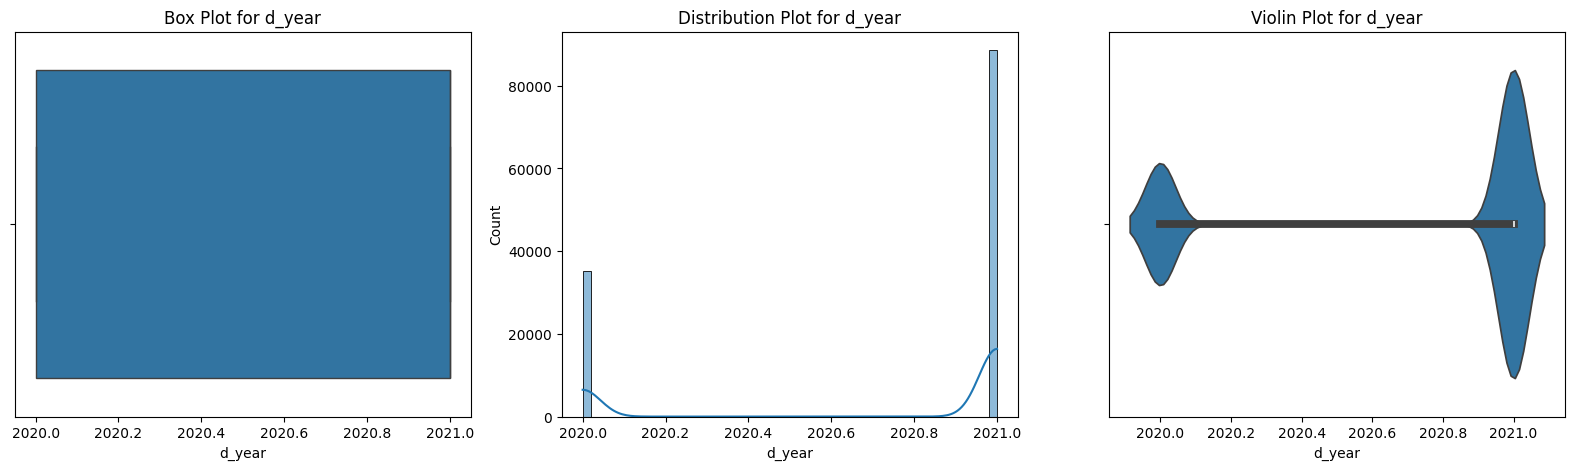

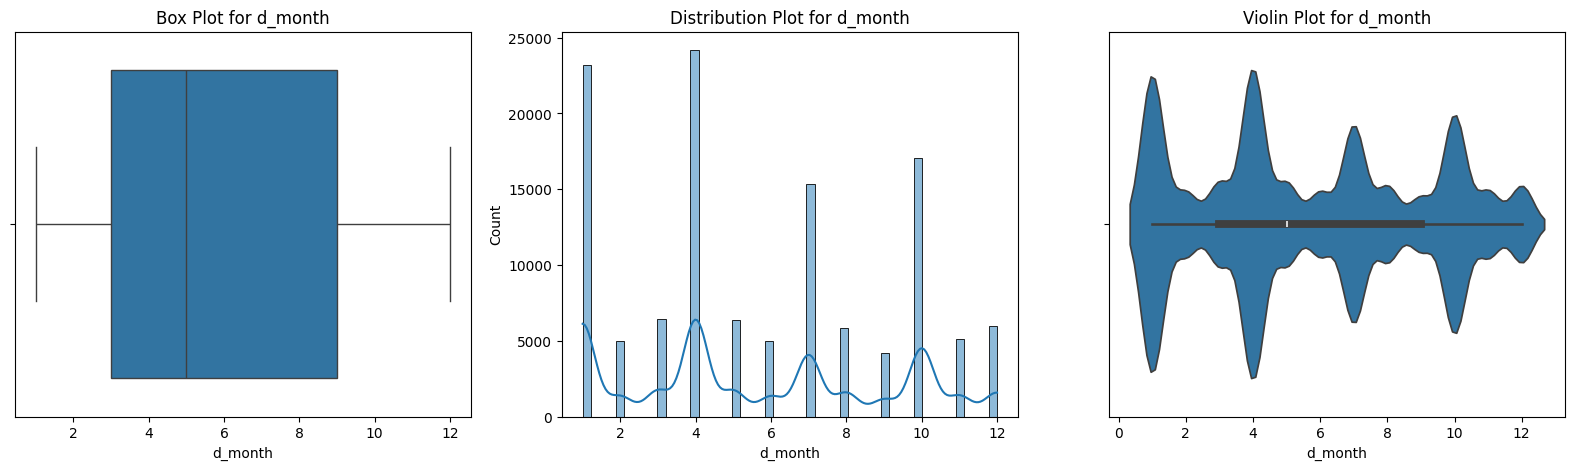

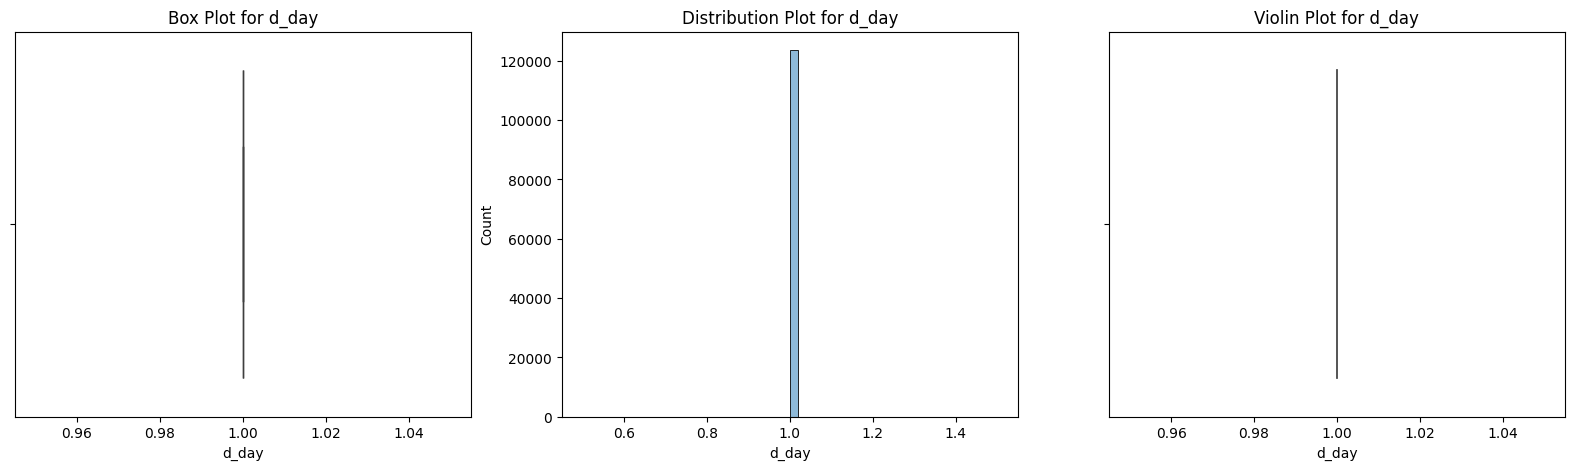

In [73]:
for i in ['quantity tons', 'customer', 'country',
       'item type', 'application', 'thickness', 'width', 'product_ref',
        'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day']:
    plot(df, i)

In [74]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day'],
      dtype='object')

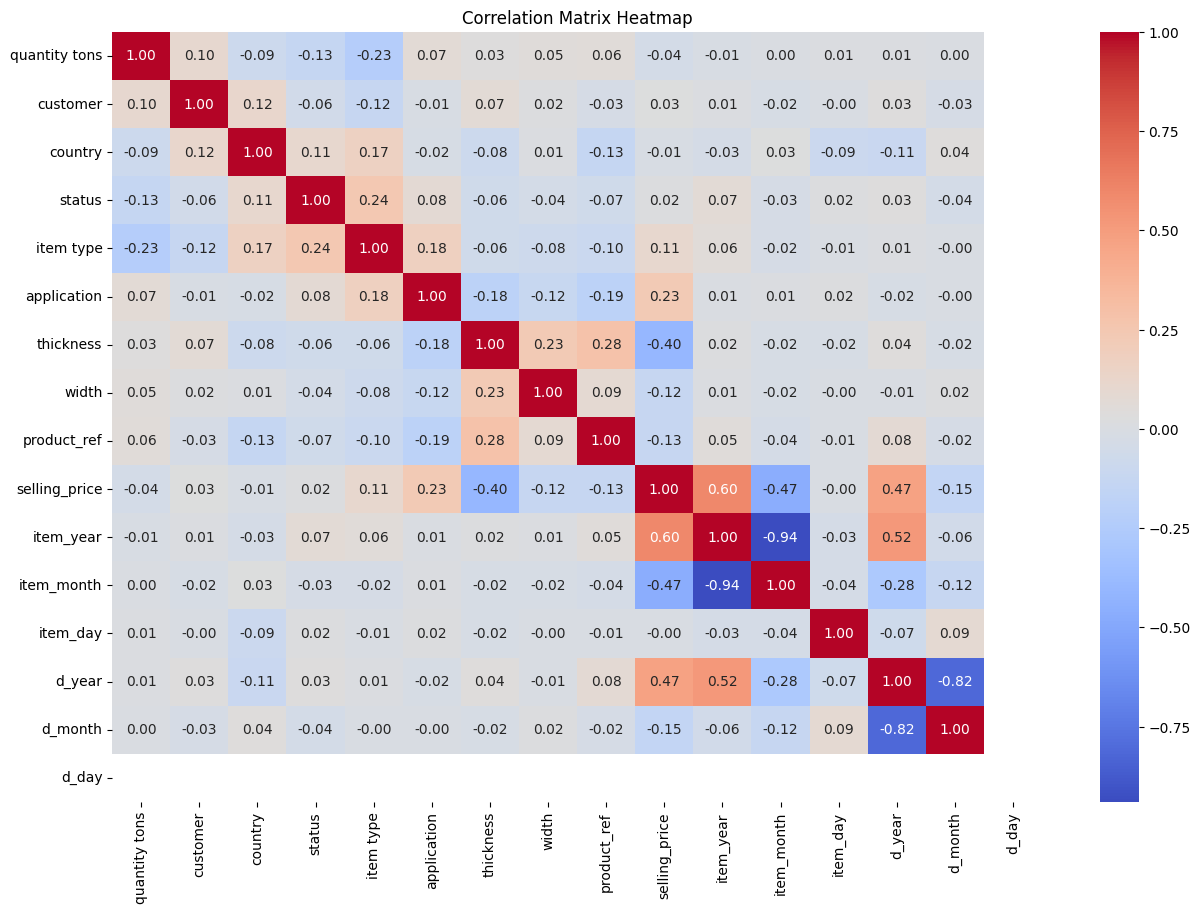

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns
col = ['quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day']

# Extracting the necessary columns
df_heatmap = df.loc[:, col]

# Converting categorical columns to numerical where necessary
for column in ['customer', 'country', 'status', 'item type', 'application']:
     df_heatmap.loc[:, column] = df_heatmap[column].astype('category').cat.codes

# Compute the correlation matrix
corr_matrix = df_heatmap.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123723 entries, 0 to 181527
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      123723 non-null  object 
 1   quantity tons  123723 non-null  float64
 2   customer       123723 non-null  float64
 3   country        123723 non-null  float64
 4   status         123723 non-null  object 
 5   item type      123723 non-null  float64
 6   application    123723 non-null  float64
 7   thickness      123723 non-null  float64
 8   width          123723 non-null  float64
 9   product_ref    123723 non-null  int64  
 10  delivery date  123723 non-null  object 
 11  selling_price  123723 non-null  float64
 12  item_year      123723 non-null  int64  
 13  item_month     123723 non-null  int64  
 14  item_day       123723 non-null  int64  
 15  d_year         123723 non-null  float64
 16  d_month        123723 non-null  float64
 17  d_day          123723 non-null  fl

In [77]:
df['d_day']=df['d_day'].astype(int)
df['d_month']=df['d_month'].astype(int)
df['d_year']=df['d_year'].astype(int)

In [78]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day'],
      dtype='object')

In [204]:
feature=df[[ 'quantity tons', 'customer', 'country','application', 'thickness', 'width', 'product_ref',
       'item_year', 'item_month', 'item_day',
       'd_year', 'd_month', 'd_day']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, df['selling_price'], test_size=0.3, random_state=42)

In [205]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [206]:
model

RandomForestRegressor(random_state=42)

In [207]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2035.58
R² Score: 0.94


In [208]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [210]:
feature.columns

Index(['quantity tons', 'customer', 'country', 'application', 'thickness',
       'width', 'product_ref', 'item_year', 'item_month', 'item_day', 'd_year',
       'd_month', 'd_day'],
      dtype='object')

In [211]:
# Save column names used for regression model training
X_reg_columns = feature.columns
with open('X_reg_columns.pkl', 'wb') as f:
    pickle.dump(X_reg_columns, f)